In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [3]:
df = pd.read_csv('./datasets/elec_data.csv')

In [4]:
# 널 값 확인
df.isna().sum()

시도            0
시군구           0
계약종별          0
년도            0
월             0
전력 사용량        0
확진자           0
평균기온          0
평균현지기압        0
평균상대습도        0
월합강수량         0
평균풍속          0
합계 일조시간       0
일조율           0
합계 일사량     3087
dtype: int64

In [5]:
# 합계 일사량 column 삭제
df.drop('합계 일사량', axis=1, inplace=True)

In [6]:
# 널 값 확인
df.isna().sum().sum()

0

In [7]:
df

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
0,서울특별시,종로구,주택용,2015,1,2.414819e+07,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
1,서울특별시,종로구,일반용,2015,1,1.181337e+08,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
2,서울특별시,종로구,교육용,2015,1,9.619909e+06,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
3,서울특별시,종로구,산업용,2015,1,6.580369e+06,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
4,서울특별시,종로구,농사용,2015,1,2.848000e+03,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43916,울산광역시,울주군,교육용,2022,1,9.139668e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43917,울산광역시,울주군,산업용,2022,1,1.030417e+09,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43918,울산광역시,울주군,농사용,2022,1,6.842901e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43919,울산광역시,울주군,가로등,2022,1,2.703994e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34


In [8]:
df.describe()

,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
count,43921.000000,43921.000000,4.392100e+04,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000,43921.000000
mean,2018.046265,6.435259,2.544570e+07,1342.984062,13.937419,1007.613834,63.920152,103.340801,2.420605,208.272116,57.190450
std,2.034706,3.482608,7.712822e+07,6418.048896,9.214738,6.492297,10.942686,112.037967,0.643917,42.300588,11.922831
min,2015.000000,1.000000,-3.138182e+06,0.000000,-4.000000,996.000000,39.000000,0.000000,0.900000,69.500000,15.720000
25%,2016.000000,3.000000,9.235820e+05,0.000000,6.300000,1001.300000,56.000000,29.100000,2.000000,182.000000,50.870000
50%,2018.000000,6.000000,3.455774e+06,0.000000,14.500000,1008.600000,63.000000,67.100000,2.400000,208.600000,58.640000
75%,2020.000000,9.000000,2.947823e+07,35.000000,22.400000,1013.500000,72.000000,139.600000,2.900000,233.800000,66.140000
max,2022.000000,12.000000,1.365568e+09,70942.000000,29.000000,1019.700000,94.000000,796.800000,4.000000,316.700000,82.570000


In [9]:
df[df['전력 사용량']<0]['전력 사용량'].value_counts()

-3138182.0    1
-915395.0     1
Name: 전력 사용량, dtype: int64

In [10]:
df['전력 사용량'] = df['전력 사용량'].replace({73111768.0 : 34986793.0, -3138182.0 : 34986793.0, 53994846.0:26539725.5, -915395.0:26539725.5 })

In [11]:
display(df[df['전력 사용량']<0]['시도'].value_counts(), df[df['전력 사용량']<0]['시군구'].value_counts(),
df[df['전력 사용량']<0]['년도'].value_counts(), df[df['전력 사용량']<0]['계약종별'].value_counts())

Series([], Name: 시도, dtype: int64)

Series([], Name: 시군구, dtype: int64)

Series([], Name: 년도, dtype: int64)

Series([], Name: 계약종별, dtype: int64)

In [12]:
y = df['전력 사용량']

<AxesSubplot:>

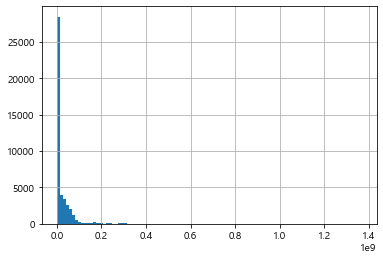

In [13]:
y.hist(bins=100)

In [14]:
y.skew() # 왜도 확인 (양의 값 => 오른쪽 꼬리가 긴 분포 => log변환)

10.893075662083326

In [15]:
log_y = np.log1p(y+1e-05)

<AxesSubplot:>

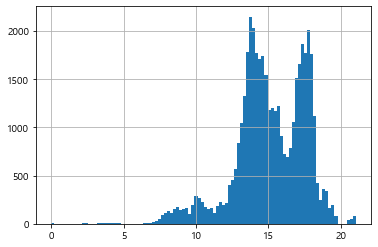

In [16]:
log_y.hist(bins=100)

In [17]:
log_y.skew()  # 왜도 확인 (0에 가까운 값 가짐)

-0.7844020546945241

In [18]:
# X, y로 나누기
y = log_y
X = df.drop(['전력 사용량', '합계 일조시간'], axis=1)

In [19]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [20]:
resultID = X_test[['시도', '시군구', '계약종별', '년도', '월']]

In [21]:
# object 인코딩
le = LabelEncoder()
c = X_train.columns[X_train.dtypes ==object]
for i in c:
    X_train[i] = le.fit_transform(X_train[i])
X_train.head()

,시도,시군구,계약종별,년도,월,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조율
31209,4,21,1,2020,2,67.0,2.5,1014.0,58,53.1,2.3,58.99
19588,4,0,1,2018,6,0.0,23.1,997.8,63,171.5,1.7,53.51
29242,6,40,0,2019,5,0.0,17.6,1003.7,61,33.2,3.0,70.18
1164,4,36,1,2015,7,0.0,25.8,996.8,71,226.0,2.8,39.23
2278,3,3,5,2015,2,0.0,5.4,1012.3,54,30.5,3.3,62.74


In [22]:
# object 인코딩
le2 = LabelEncoder()
c = X_test.columns[X_test.dtypes ==object]
for i in c:
    X_test[i] = le2.fit_transform(X_test[i])
X_test.head()

,시도,시군구,계약종별,년도,월,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조율
9123,3,13,0,2016,8,0.0,27.7,997.8,72,141.5,3.0,70.62
32601,4,35,3,2020,10,718.0,14.3,1010.5,61,0.0,2.1,65.30
35443,6,44,6,2020,5,113.0,16.7,1002.0,71,101.2,2.7,48.31
28175,3,28,1,2019,12,0.0,7.0,1015.3,50,50.3,2.6,70.22
21093,3,52,5,2018,4,0.0,14.5,1007.5,63,156.4,4.0,62.67


In [23]:
sido = resultID['시도']

In [24]:
sigun = resultID['시군구']

In [25]:
g = resultID['계약종별']

In [26]:
year = resultID['년도']

In [27]:
month = resultID['월']

In [28]:
# RandomForestRegressor

rf = RandomForestRegressor(random_state=0)

In [29]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [30]:
result = rf.predict(X_test)

In [31]:
y_test.isna().sum()

0

In [32]:
y_test

9123     13.761801
32601    15.810252
35443    14.552234
28175    14.736753
21093    18.000120
           ...    
24212    13.566177
34452    13.849158
24681    13.849830
34405    13.270537
26792    14.277444
Name: 전력 사용량, Length: 13177, dtype: float64

In [33]:
y_train.isna().sum()

0

In [34]:
from sklearn.metrics import roc_auc_score, r2_score

r2 = r2_score(y_test, result)
print('r2_score : ', r2)

r2_score :  0.9946618048469126


In [35]:
len(result)

13177

In [36]:
save = pd.DataFrame({'시도': sido, '시군구' : sigun, '계약종별' : g, '년도':year, '월':month, '전력 사용량 예측' : result})
save

,시도,시군구,계약종별,년도,월,전력 사용량 예측
9123,부산광역시,남구,가로등,2016,8,13.724986
32601,서울특별시,성북구,산업용,2020,10,15.873919
35443,인천광역시,옹진군,주택용,2020,5,14.525656
28175,부산광역시,북구,교육용,2019,12,14.658093
21093,부산광역시,해운대구,일반용,2018,4,17.993579
...,...,...,...,...,...,...
24212,대전광역시,대덕구,가로등,2018,7,13.615563
34452,대구광역시,남구,산업용,2020,1,13.826642
24681,울산광역시,북구,가로등,2018,9,13.788656
34405,부산광역시,연제구,가로등,2020,12,13.266896


In [37]:
# save 파일의 시도와 시군구 계약종별을 순서대로
save = save.sort_index()
save

,시도,시군구,계약종별,년도,월,전력 사용량 예측
0,서울특별시,종로구,주택용,2015,1,16.942739
1,서울특별시,종로구,일반용,2015,1,18.485599
4,서울특별시,종로구,농사용,2015,1,8.374980
6,서울특별시,종로구,심 야,2015,1,15.126112
7,서울특별시,중구,주택용,2015,1,16.688077
...,...,...,...,...,...,...
43893,울산광역시,동구,주택용,2022,1,16.724451
43900,울산광역시,중구,주택용,2022,1,17.156360
43903,울산광역시,중구,산업용,2022,1,14.775464
43913,울산광역시,남구,심 야,2022,1,14.963917


In [38]:
save = save.reset_index()
save.drop('index', axis=1, inplace=True)
save

,시도,시군구,계약종별,년도,월,전력 사용량 예측
0,서울특별시,종로구,주택용,2015,1,16.942739
1,서울특별시,종로구,일반용,2015,1,18.485599
2,서울특별시,종로구,농사용,2015,1,8.374980
3,서울특별시,종로구,심 야,2015,1,15.126112
4,서울특별시,중구,주택용,2015,1,16.688077
...,...,...,...,...,...,...
13172,울산광역시,동구,주택용,2022,1,16.724451
13173,울산광역시,중구,주택용,2022,1,17.156360
13174,울산광역시,중구,산업용,2022,1,14.775464
13175,울산광역시,남구,심 야,2022,1,14.963917


In [39]:
# save.to_csv("RandomForestRegressor.csv", index=False)

In [40]:
score = cross_val_score(rf, X_train, y_train)
print('Average :',score.mean())

Average : 0.9935719879106395


In [41]:
# RMSE
from sklearn.model_selection import cross_val_score

y = save['전력 사용량 예측']
X = save.drop(['전력 사용량 예측'], axis=1)

rf3 = RandomForestRegressor(random_state=0)
neg_mse = cross_val_score(rf3, X, y, cv=5, scoring='neg_mean_squared_error')
mse = neg_mse*-1
avg_mse = np.mean(mse)
rmse = np.sqrt(mse)
avg_rmse = np.mean(rmse)

print('5교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse, 2))
print('5교차 검증의 개별 RMSE scores :', np.round(rmse, 2))
print('5교차 검증의 개별 평균 RMSE : ', np.round(avg_rmse, 2))

5교차 검증의 개별 Negative MSE scores :  [nan nan nan nan nan]
5교차 검증의 개별 RMSE scores : [nan nan nan nan nan]
5교차 검증의 개별 평균 RMSE :  nan


In [42]:
def get_model_cv_prediction(model, X_data, y_target, cv=5, scoring='neg_mean_squared_error'):
    neg_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = neg_mse*(-1)
    avg_mse = np.mean(mse)
    rmse = np.sqrt(mse)
    avg_rmse = np.mean(rmse)
    
    print('####', model.__class__.__name__, '####')
    print('5교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse, 2))
    print('5교차 검증의 개별 RMSE scores :', np.round(rmse, 2))
    print('5교차 검증의 개별 평균 RMSE : ', np.round(avg_rmse, 2))

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gbm_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgbm_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gbm_reg, xgb_reg, lgbm_reg]

for model in models:
    get_model_cv_prediction(model, X, y)

#### DecisionTreeRegressor ####
5교차 검증의 개별 Negative MSE scores :  [nan nan nan nan nan]
5교차 검증의 개별 RMSE scores : [nan nan nan nan nan]
5교차 검증의 개별 평균 RMSE :  nan
#### RandomForestRegressor ####
5교차 검증의 개별 Negative MSE scores :  [nan nan nan nan nan]
5교차 검증의 개별 RMSE scores : [nan nan nan nan nan]
5교차 검증의 개별 평균 RMSE :  nan
#### GradientBoostingRegressor ####
5교차 검증의 개별 Negative MSE scores :  [nan nan nan nan nan]
5교차 검증의 개별 RMSE scores : [nan nan nan nan nan]
5교차 검증의 개별 평균 RMSE :  nan
#### XGBRegressor ####
5교차 검증의 개별 Negative MSE scores :  [nan nan nan nan nan]
5교차 검증의 개별 RMSE scores : [nan nan nan nan nan]
5교차 검증의 개별 평균 RMSE :  nan
#### LGBMRegressor ####
5교차 검증의 개별 Negative MSE scores :  [nan nan nan nan nan]
5교차 검증의 개별 RMSE scores : [nan nan nan nan nan]
5교차 검증의 개별 평균 RMSE :  nan


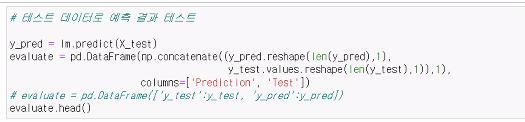